In [5]:
import pandas as pd

filename_data = "../input/weather_prediction_dataset_light.csv"
data = pd.read_csv(filename_data)
import string
print({x.lstrip(string.ascii_uppercase + "_") for x in data.columns if x not in ["MONTH", "DATE"]})
print(data.shape)
print(data.head())

{'global_radiation', 'humidity', 'temp_mean', 'sunshine', 'temp_max', 'pressure', 'cloud_cover', 'precipitation', 'temp_min'}
(3654, 91)
       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_t

In [7]:
import re
feature_names = set()
for col in data.columns:
    feature_names.update(re.findall('[^A-Z]{2,}', col))
feature_names

{'_cloud_cover',
 '_global_radiation',
 '_humidity',
 '_precipitation',
 '_pressure',
 '_sunshine',
 '_temp_max',
 '_temp_mean',
 '_temp_min'}

<Axes: xlabel='Day', ylabel='Basel sunchine hours'>

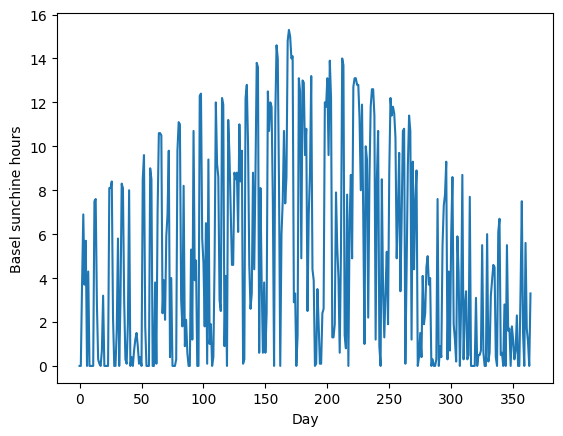

In [8]:
data.iloc[:365]['BASEL_sunshine'].plot(xlabel="Day",ylabel="Basel sunchine hours")

In [18]:
nr_rows = 365*3
# data
X_data = data.loc[:nr_rows].drop(columns=['DATE', 'MONTH'])

# labels (sunshine hours the next day)
y_data = data.loc[1:(nr_rows + 1)]["BASEL_sunshine"]
# print(f'X={X_data.head()}')
# print(f'y={y_data.head()}')
# print(data.describe())
from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=0)

In [24]:
from tensorflow import keras
def create_nn():
    # Input layer
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')

    # Dense layers
    layers_dense = keras.layers.Dense(100, 'relu')(inputs)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)

    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)

    return keras.Model(inputs=inputs, outputs=outputs, name="weather_prediction_model")
def compile_model(model):
    model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model = create_nn()
compile_model(model)
# model.summary()